The <a href = "https://www.kaggle.com/olistbr/brazilian-ecommerce">Olist</a> Database


<img src = 'https://i.imgur.com/HRhd2Y0.png'>

In [1]:
# importando bibliotecas

import missingno as mn
import pandas as pd
import numpy as np

In [2]:
#importando datasets

df_items = pd.read_csv('../datasets/olist_order_items_dataset.csv')
df_payments = pd.read_csv("../datasets/olist_order_payments_dataset.csv")
df_reviews = pd.read_csv("../datasets/olist_order_reviews_dataset.csv")
df_orders = pd.read_csv("../datasets/olist_orders_dataset.csv")
df_products = pd.read_csv("../datasets/olist_products_dataset.csv")
df_sellers = pd.read_csv("../datasets/olist_sellers_dataset.csv")
df_category = pd.read_csv("../datasets/product_category_name_translation.csv")

In [7]:
#order items data
df_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [8]:
#payments data
df_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [9]:
df_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [10]:
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [12]:
df_products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


### Items dataframe

In [13]:
df_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [18]:
#drop columns:

df_items.drop(columns="shipping_limit_date", axis = 1, inplace = True)
df_items.head()

,order_id,order_item_id,product_id,seller_id,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14


<AxesSubplot:>

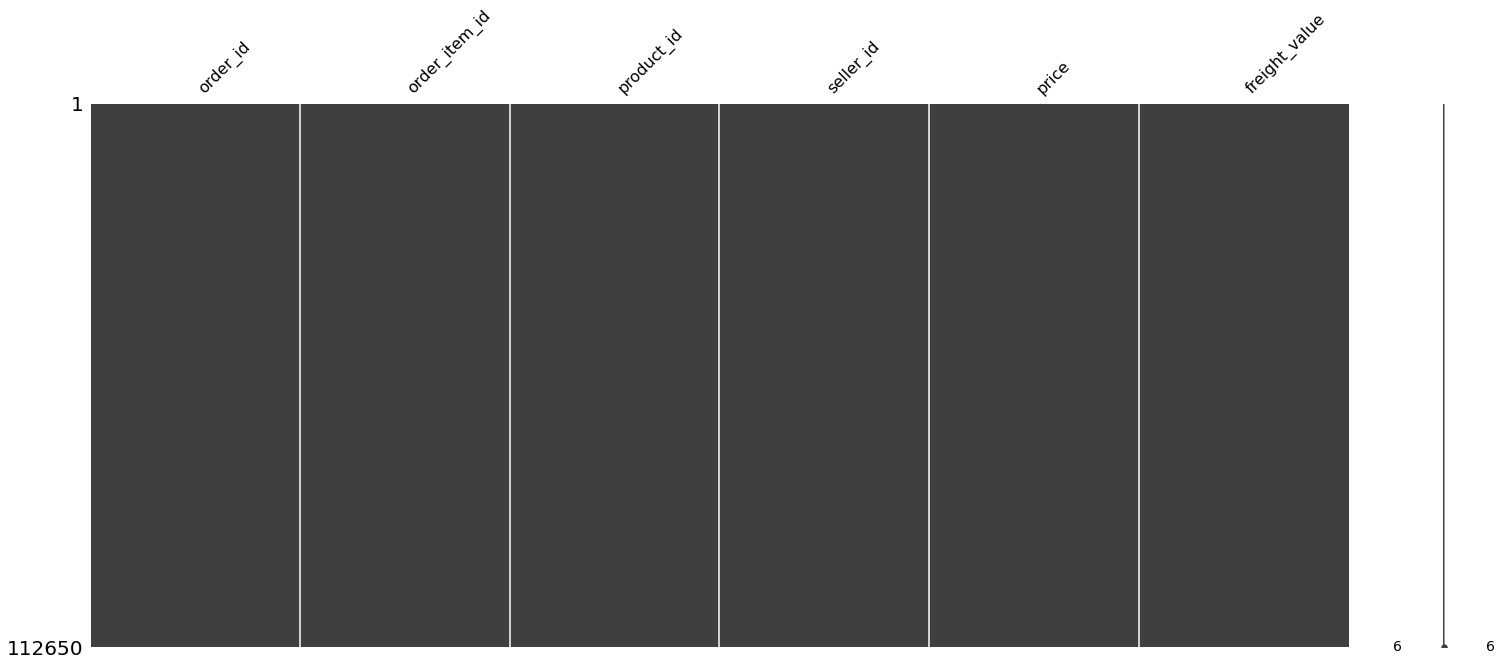

In [19]:
#checando nulos
mn.matrix(df_items)

In [20]:
df_items.isnull().sum()/len(df_orders)*100

order_id         0.0
order_item_id    0.0
product_id       0.0
seller_id        0.0
price            0.0
freight_value    0.0
dtype: float64

In [21]:
df_items.isnull().values.any()

False

Não há valores nulos neste dataframe

In [22]:
df_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   order_id       112650 non-null  object 
 1   order_item_id  112650 non-null  int64  
 2   product_id     112650 non-null  object 
 3   seller_id      112650 non-null  object 
 4   price          112650 non-null  float64
 5   freight_value  112650 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 5.2+ MB


In [45]:
items = df_items.groupby('order_id', as_index = False).\
    agg({
    'freight_value': "sum",
    'product_id': 'count'
})

items['valor_frete_real'] = round(items['freight_value'] / items['product_id'],2)
items.head()

,order_id,freight_value,product_id,valor_frete_real
0,00010242fe8c5a6d1ba2dd792cb16214,13.29,1,13.29
1,00018f77f2f0320c557190d7a144bdd3,19.93,1,19.93
2,000229ec398224ef6ca0657da4fc703e,17.87,1,17.87
3,00024acbcdf0a6daa1e931b038114c75,12.79,1,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,18.14,1,18.14


In [46]:
items.shape

(98666, 4)

In [47]:
items[items['order_id'].duplicated()]

,order_id,freight_value,product_id,valor_frete_real


In [48]:
items[items['order_id'] == '00337fe25a3780b3424d9ad7c5a4b35e']

,order_id,freight_value,product_id,valor_frete_real
82,00337fe25a3780b3424d9ad7c5a4b35e,19.88,2,9.94


### Payments dataframe

In [25]:
df_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [26]:
df_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [27]:
df_payments.isnull().values.any()

False

In [29]:
df_payments[df_payments['order_id'] == 'fd86c80924b4be8fb7f58c4ecc680dae']

,order_id,payment_sequential,payment_type,payment_installments,payment_value
29780,fd86c80924b4be8fb7f58c4ecc680dae,3,voucher,1,44.87
45433,fd86c80924b4be8fb7f58c4ecc680dae,2,voucher,1,44.87
103778,fd86c80924b4be8fb7f58c4ecc680dae,1,credit_card,1,76.10


In [39]:
payments = df_payments.groupby('order_id').\
    agg({'payment_value': 'sum',
         'payment_sequential': 'max'}).reset_index()

#payments[payments['order_id'] =='fd86c80924b4be8fb7f58c4ecc680dae']

,order_id,payment_value,payment_sequential
98513,fd86c80924b4be8fb7f58c4ecc680dae,165.84,3


### Reviews dataframe

In [50]:
df_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [51]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   review_id                100000 non-null  object
 1   order_id                 100000 non-null  object
 2   review_score             100000 non-null  int64 
 3   review_comment_title     11715 non-null   object
 4   review_comment_message   41753 non-null   object
 5   review_creation_date     100000 non-null  object
 6   review_answer_timestamp  100000 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [52]:
#drop unnecessary columns:

cols = ['review_id', 'review_creation_date', 'review_answer_timestamp', 'review_comment_title', 'review_comment_message']

df_reviews.drop(columns=cols, axis = 1, inplace = True)
df_reviews.head()

,order_id,review_score
0,73fc7af87114b39712e6da79b0a377eb,4
1,a548910a1c6147796b98fdf73dbeba33,5
2,f9e4b658b201a9f2ecdecbb34bed034b,5
3,658677c97b385a9be170737859d3511b,5
4,8e6bfb81e283fa7e4f11123a3fb894f1,5


In [53]:
df_reviews.isnull().values.any()

False

In [54]:
df_reviews.review_score.value_counts(dropna = False)

5    57420
4    19200
1    11858
3     8287
2     3235
Name: review_score, dtype: int64

In [55]:
df_reviews[df_reviews['order_id'].duplicated()]

,order_id,review_score
1128,5040757d4e06a4be96d3827b860b4e7c,5
3127,cf73e2cb1f4a9480ed70c154da3d954a,5
8164,e1bc1083cd7acd30d0576335373b907d,5
9128,c7cfea0c153e6382e32e84c2a9dd7d2e,5
9868,f9c78e6e58306dc81efbbada1ac11f24,3
...,...,...
99762,c0db7d31ace61fc360a3eaa34dd3457c,5
99883,42ae1967f68c90bb325783ac55d761ce,4
99939,c5334d330e36d2a810a7a13c72e135ee,5
99953,a7dbcf5043158d6fa72859eead2f3d10,4


In [56]:
df_reviews[df_reviews['order_id'] == 'c0db7d31ace61fc360a3eaa34dd3457c']

,order_id,review_score
68238,c0db7d31ace61fc360a3eaa34dd3457c,5
99762,c0db7d31ace61fc360a3eaa34dd3457c,5


In [57]:
df_reviews.shape

(100000, 2)

In [59]:
reviews = df_reviews.groupby('order_id')['review_score'].max().reset_index()
reviews[reviews['order_id'].duplicated()]

,order_id,review_score


### Orders dataframe

In [60]:
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


<AxesSubplot:>

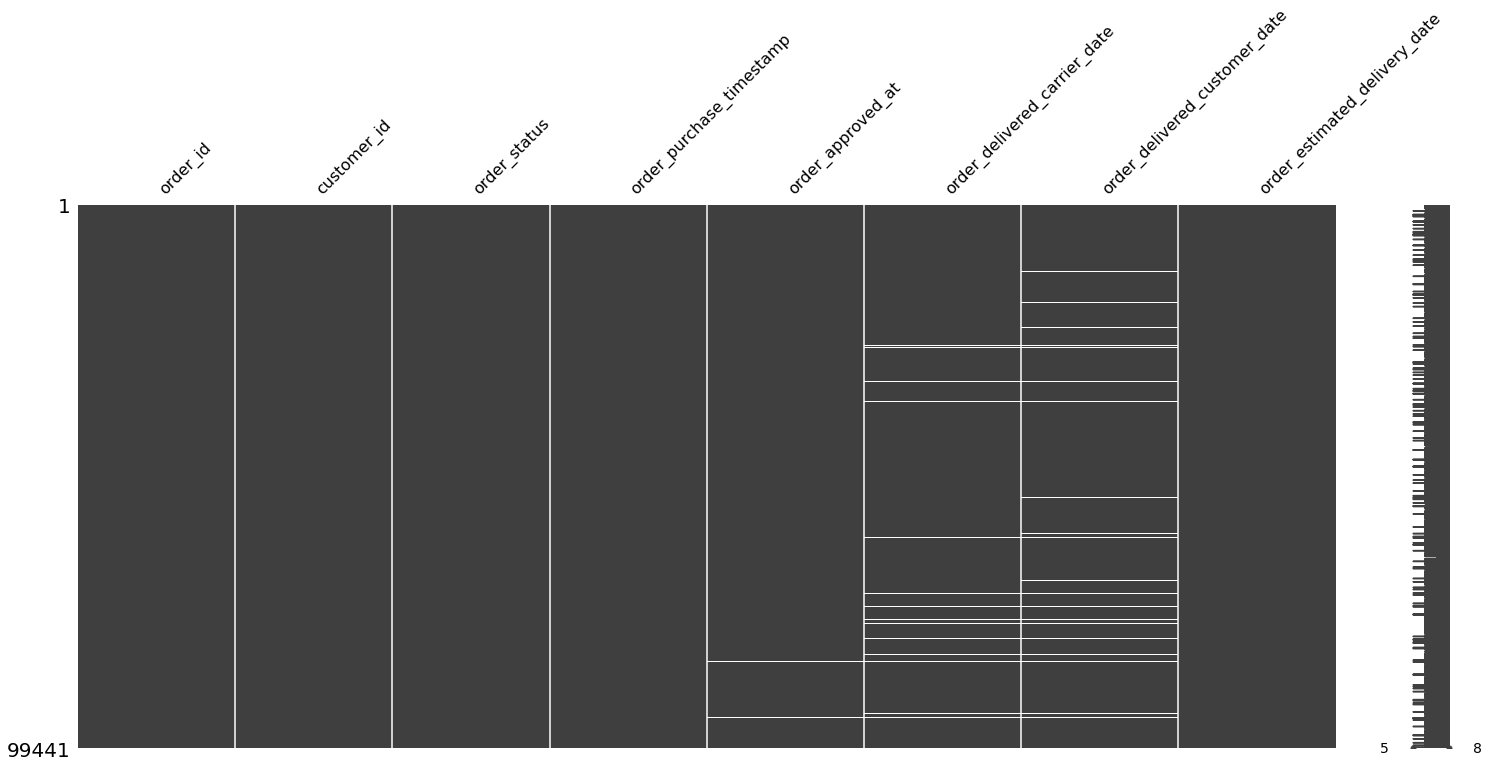

In [61]:
#checking valores nulos
mn.matrix(df_orders)

In [62]:
df_orders.isnull().sum()/len(df_orders)*100

order_id                         0.000000
customer_id                      0.000000
order_status                     0.000000
order_purchase_timestamp         0.000000
order_approved_at                0.160899
order_delivered_carrier_date     1.793023
order_delivered_customer_date    2.981668
order_estimated_delivery_date    0.000000
dtype: float64

In [63]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


Vamos checar somente os pedidos que foram entregues, que são os que nos interessam.

In [68]:
orders = df_orders[df_orders['order_status'] == "delivered"]

In [69]:
orders.isnull().sum()

order_id                          0
customer_id                       0
order_status                      0
order_purchase_timestamp          0
order_approved_at                14
order_delivered_carrier_date      2
order_delivered_customer_date     8
order_estimated_delivery_date     0
dtype: int64

In [70]:
orders.dropna(axis = 0, inplace = True)

<ipython-input-70-eee5957e92f8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders.dropna(axis = 0, inplace = True)


In [71]:
orders.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

In [72]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [73]:
orders.isnull().values.any()

False

In [74]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96455 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       96455 non-null  object
 1   customer_id                    96455 non-null  object
 2   order_status                   96455 non-null  object
 3   order_purchase_timestamp       96455 non-null  object
 4   order_approved_at              96455 non-null  object
 5   order_delivered_carrier_date   96455 non-null  object
 6   order_delivered_customer_date  96455 non-null  object
 7   order_estimated_delivery_date  96455 non-null  object
dtypes: object(8)
memory usage: 6.6+ MB


In [77]:
orders[orders['order_id'].duplicated()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date


### Products dataframe

In [78]:
df_products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


Só precisamos da coluna com nome da categoria. Vamos apagar o restante.

In [82]:
products = df_products[['product_id', 'product_weight_g', 'product_photos_qty']]
products.head()

,product_id,product_weight_g,product_photos_qty
0,1e9e8ef04dbcff4541ed26657ea517e5,225.0,1.0
1,3aa071139cb16b67ca9e5dea641aaa2f,1000.0,1.0
2,96bd76ec8810374ed1b65e291975717f,154.0,1.0
3,cef67bcfe19066a932b7673e239eb23d,371.0,1.0
4,9dc1a7de274444849c219cff195d0b71,625.0,4.0


<AxesSubplot:>

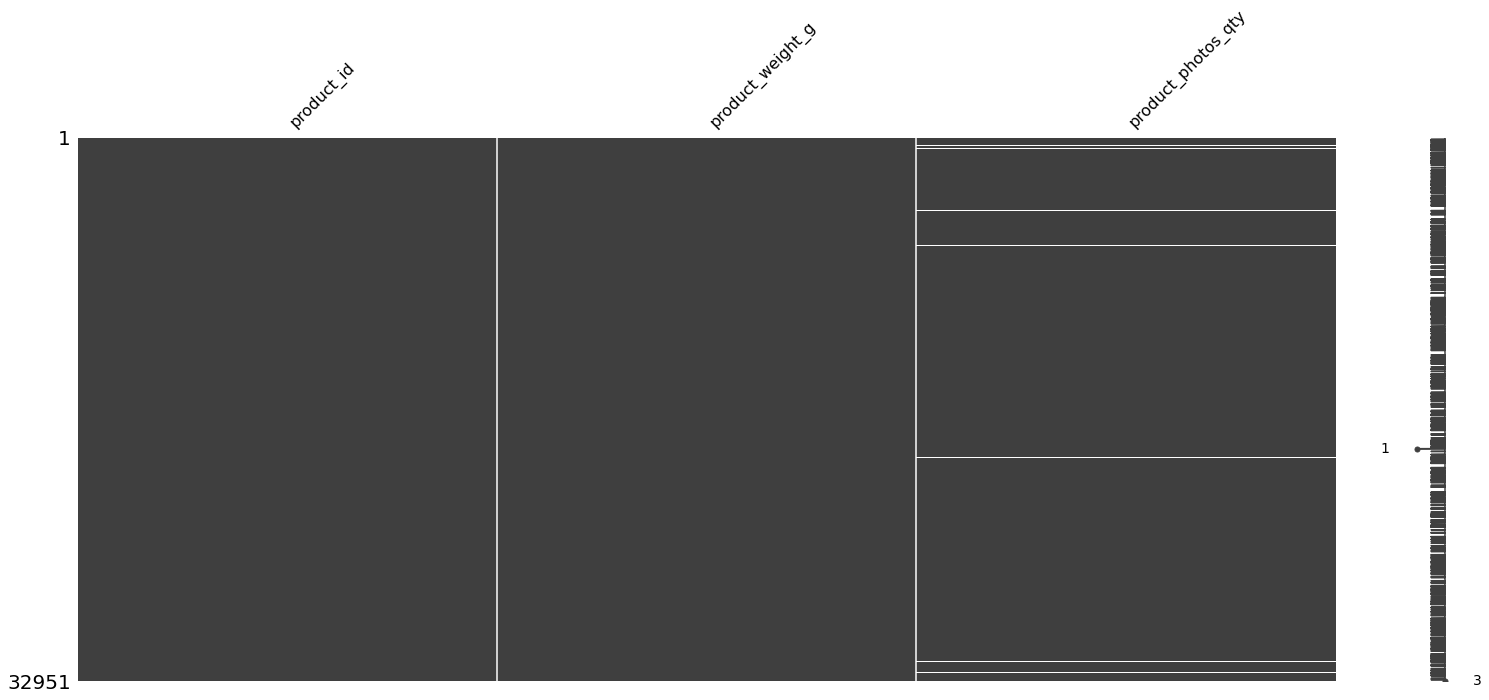

In [83]:
#checando nulos:
mn.matrix(products)

**Code:**

In [85]:
products['product_photos_qty'].fillna(value= 0, inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


**Test:**

<AxesSubplot:>

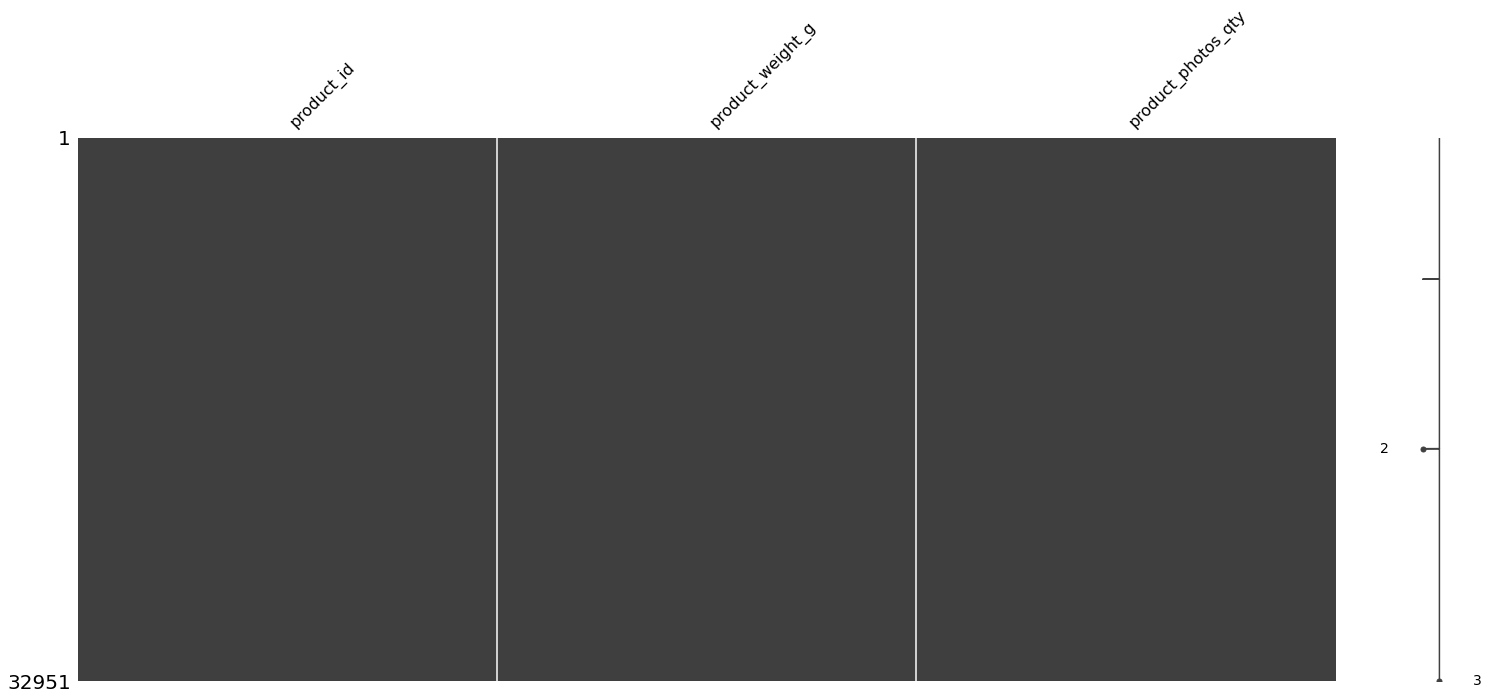

In [86]:
mn.matrix(products)

In [87]:
products.isnull().values.any()

True

In [88]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_id          32951 non-null  object 
 1   product_weight_g    32949 non-null  float64
 2   product_photos_qty  32951 non-null  float64
dtypes: float64(2), object(1)
memory usage: 772.4+ KB


In [89]:
df_items.head()

,order_id,order_item_id,product_id,seller_id,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14


In [93]:
df_items_product = pd.merge(df_items, products, how = 'left', on = 'product_id')
items_product = df_items_product.groupby('order_id').agg({'product_weight_g': 'sum',
                                                          'product_photos_qty': 'sum'}).reset_index()

items_product.head()

,order_id,product_weight_g,product_photos_qty
0,00010242fe8c5a6d1ba2dd792cb16214,650.0,4.0
1,00018f77f2f0320c557190d7a144bdd3,30000.0,2.0
2,000229ec398224ef6ca0657da4fc703e,3050.0,2.0
3,00024acbcdf0a6daa1e931b038114c75,200.0,1.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,3750.0,1.0


# Union dataframes

The order dataset is the principal dataset. We'll merge others dataset in it.

### Combining with reviews

In [95]:
df_to_cluster = pd.merge(orders, reviews, how = 'left', on = 'order_id')
df_to_cluster.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_score
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,4
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,4
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,5
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,5
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,5


<AxesSubplot:>

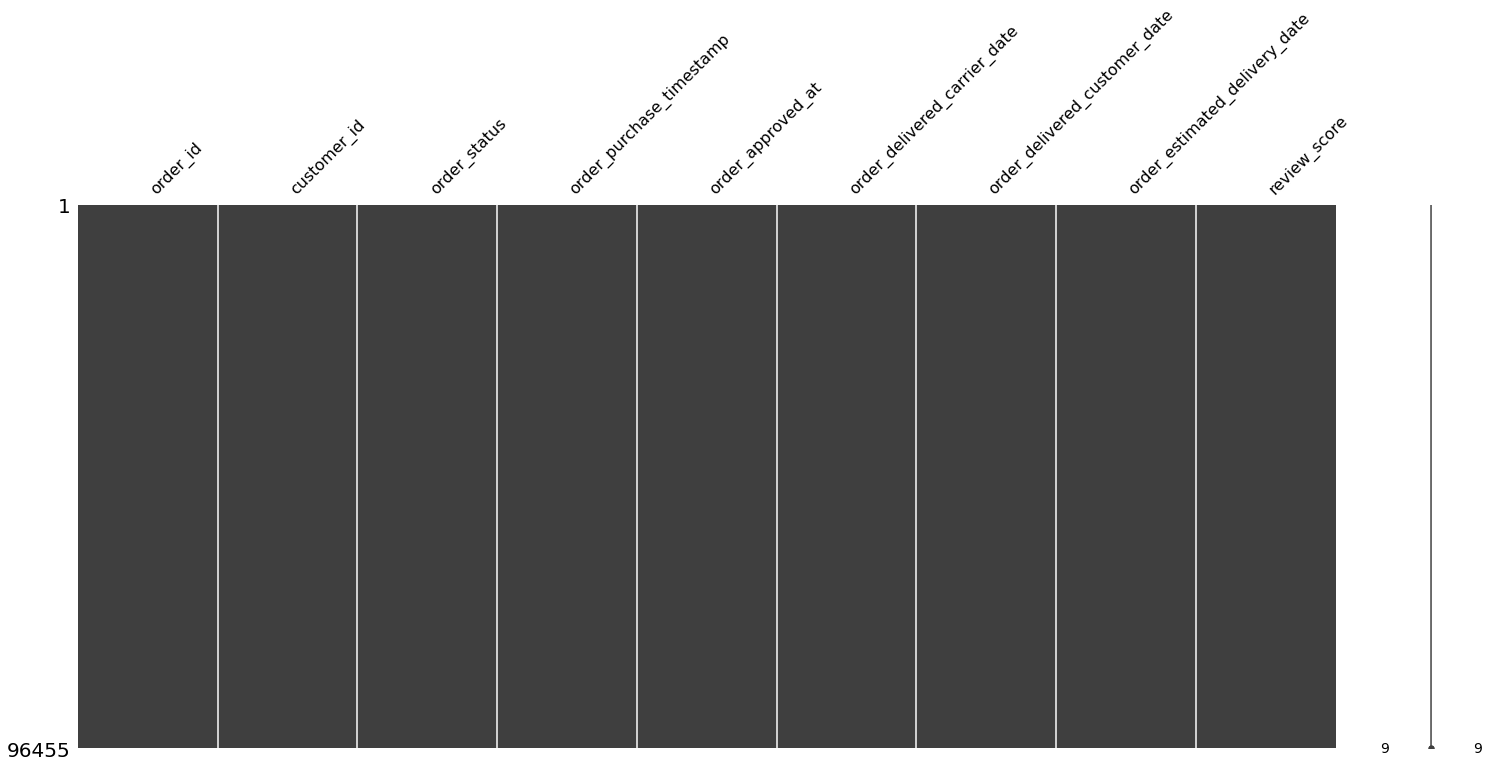

In [96]:
mn.matrix(df_to_cluster)

In [97]:
df_to_cluster.shape

(96455, 9)

In [98]:
df_to_cluster[df_to_cluster['order_id'].duplicated()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_score


### Combining with items

In [99]:
items.head()

,order_id,freight_value,product_id,valor_frete_real
0,00010242fe8c5a6d1ba2dd792cb16214,13.29,1,13.29
1,00018f77f2f0320c557190d7a144bdd3,19.93,1,19.93
2,000229ec398224ef6ca0657da4fc703e,17.87,1,17.87
3,00024acbcdf0a6daa1e931b038114c75,12.79,1,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,18.14,1,18.14


In [100]:
df_to_cluster = pd.merge(df_to_cluster, items[['order_id','valor_frete_real']], how = 'left', on = 'order_id')
df_to_cluster.shape

(96455, 10)

In [101]:
df_to_cluster.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_score,valor_frete_real
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,4,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,4,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,5,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,5,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,5,8.72


<AxesSubplot:>

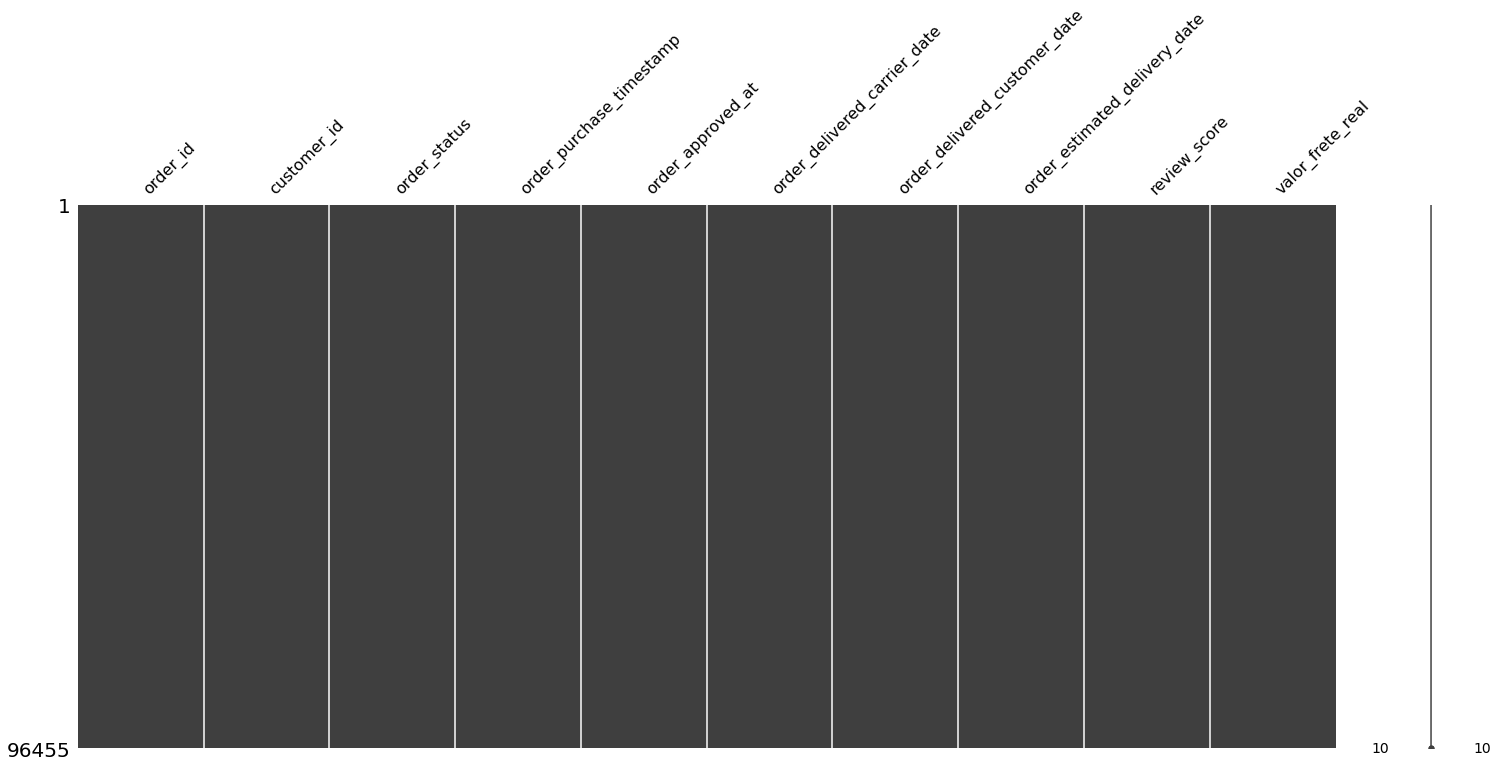

In [102]:
mn.matrix(df_to_cluster)

### Combining with products

In [103]:
products.shape

(32951, 3)

In [104]:
products.head()

,product_id,product_weight_g,product_photos_qty
0,1e9e8ef04dbcff4541ed26657ea517e5,225.0,1.0
1,3aa071139cb16b67ca9e5dea641aaa2f,1000.0,1.0
2,96bd76ec8810374ed1b65e291975717f,154.0,1.0
3,cef67bcfe19066a932b7673e239eb23d,371.0,1.0
4,9dc1a7de274444849c219cff195d0b71,625.0,4.0


In [109]:
df_to_cluster = pd.merge(df_to_cluster, items_product, how = 'left', on = 'order_id')
df_to_cluster.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_score,valor_frete_real,product_weight_g,product_photos_qty
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,4,8.72,500.0,4.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,4,22.76,400.0,1.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,5,19.22,420.0,1.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,5,27.20,450.0,3.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,5,8.72,250.0,4.0


### Combining with payments

In [110]:
payments.head()

,order_id,payment_value,payment_sequential
0,00010242fe8c5a6d1ba2dd792cb16214,72.19,1
1,00018f77f2f0320c557190d7a144bdd3,259.83,1
2,000229ec398224ef6ca0657da4fc703e,216.87,1
3,00024acbcdf0a6daa1e931b038114c75,25.78,1
4,00042b26cf59d7ce69dfabb4e55b4fd9,218.04,1


In [111]:
df_to_cluster = pd.merge(df_to_cluster, payments, how = 'left', on = 'order_id')
df_to_cluster.shape

(96455, 14)

In [112]:
df_to_cluster.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_score,valor_frete_real,product_weight_g,product_photos_qty,payment_value,payment_sequential
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,4,8.72,500.0,4.0,38.71,3.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,4,22.76,400.0,1.0,141.46,1.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,5,19.22,420.0,1.0,179.12,1.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,5,27.20,450.0,3.0,72.20,1.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,5,8.72,250.0,4.0,28.62,1.0


<AxesSubplot:>

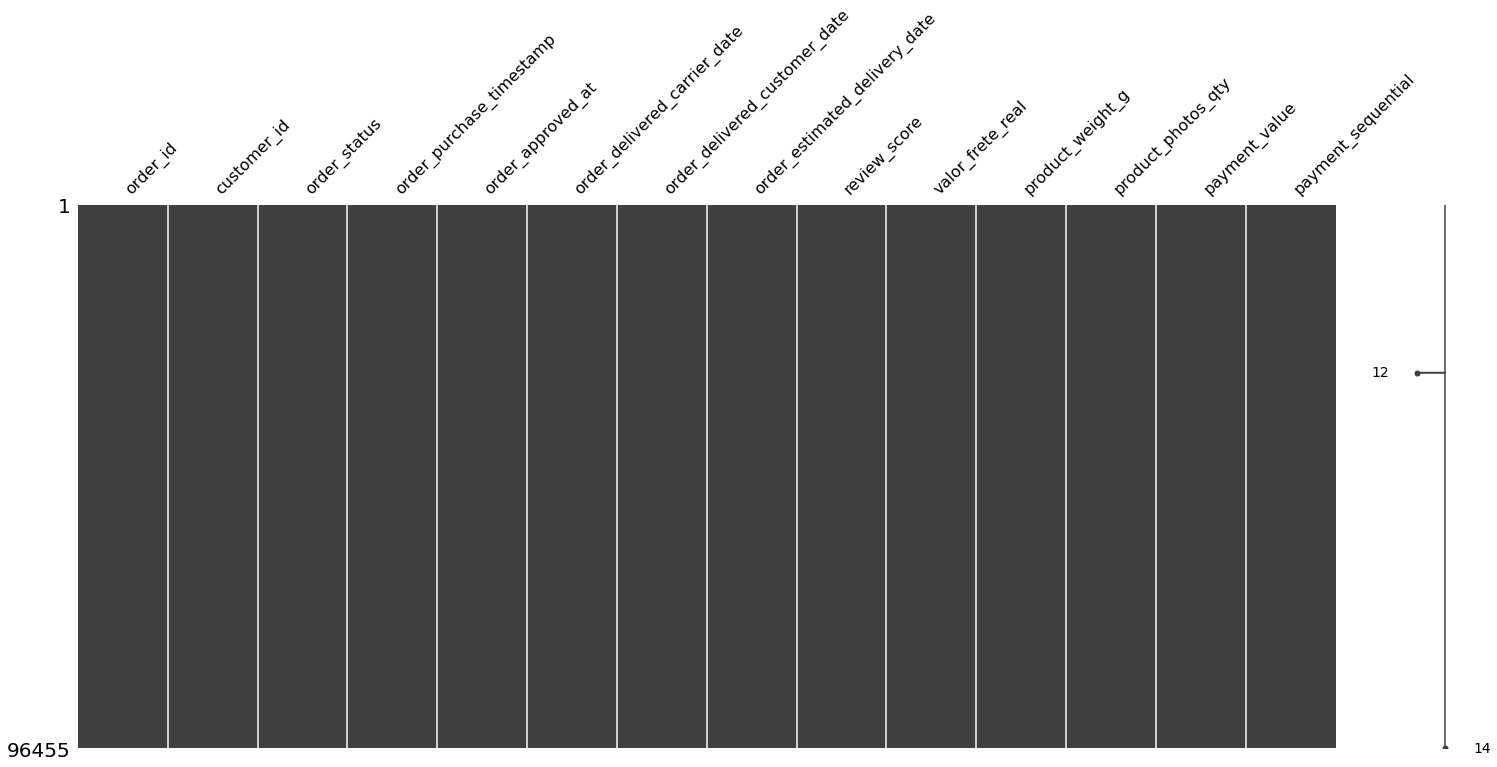

In [113]:
#checking missing values
mn.matrix(df_to_cluster)

In [114]:
df_to_cluster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96455 entries, 0 to 96454
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       96455 non-null  object 
 1   customer_id                    96455 non-null  object 
 2   order_status                   96455 non-null  object 
 3   order_purchase_timestamp       96455 non-null  object 
 4   order_approved_at              96455 non-null  object 
 5   order_delivered_carrier_date   96455 non-null  object 
 6   order_delivered_customer_date  96455 non-null  object 
 7   order_estimated_delivery_date  96455 non-null  object 
 8   review_score                   96455 non-null  int64  
 9   valor_frete_real               96455 non-null  float64
 10  product_weight_g               96455 non-null  float64
 11  product_photos_qty             96455 non-null  float64
 12  payment_value                  96454 non-null 

In [116]:
#drop unecessary columns

df_to_cluster.drop(columns = ['order_id', 'customer_id', 'order_status'], inplace = True)
df_to_cluster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96455 entries, 0 to 96454
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_purchase_timestamp       96455 non-null  object 
 1   order_approved_at              96455 non-null  object 
 2   order_delivered_carrier_date   96455 non-null  object 
 3   order_delivered_customer_date  96455 non-null  object 
 4   order_estimated_delivery_date  96455 non-null  object 
 5   review_score                   96455 non-null  int64  
 6   valor_frete_real               96455 non-null  float64
 7   product_weight_g               96455 non-null  float64
 8   product_photos_qty             96455 non-null  float64
 9   payment_value                  96454 non-null  float64
 10  payment_sequential             96454 non-null  float64
dtypes: float64(5), int64(1), object(5)
memory usage: 8.8+ MB


In [117]:
#save dataframe to csv
df_to_cluster.to_csv('../datasets/data_to_pca.csv', index=False)